In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/btpdata final.xlsx')

In [ ]:
# DEPT = DEPTH, GR_EDTC = GAMMA RAY, NPHI = NEUTRON POROSITY, RHOZ = BULKDENSITY, PEFZ = PHOTOELECTRIC
df

,Well_Name,DEPT,GR_EDTC,NPHI,RHOZ,PEFZ
0,MIP_4H,122.5,50.0387,0.8214,2.0006,5.6412
1,MIP_4H,123.0,51.8071,0.7914,2.0006,5.6412
2,MIP_4H,123.5,50.3461,0.7087,2.0006,5.6412
3,MIP_4H,124.0,48.3869,0.6884,2.0006,5.6412
4,MIP_4H,124.5,48.6630,0.7115,2.0006,5.6412
...,...,...,...,...,...,...
15297,MIP_4H,7771.0,119.7647,0.1302,2.2757,2.0310
15298,MIP_4H,7771.5,119.7647,0.1302,2.2746,2.0203
15299,MIP_4H,7772.0,119.7647,0.1302,2.2734,2.0101
15300,MIP_4H,7772.5,119.7647,0.1302,2.2720,2.0310


In [ ]:
df.corr()

,DEPT,GR_EDTC,NPHI,RHOZ,PEFZ
DEPT,1.000000,0.601413,-0.413816,0.420312,-0.478410
GR_EDTC,0.601413,1.000000,-0.229379,0.394119,-0.442783
NPHI,-0.413816,-0.229379,1.000000,-0.457205,0.448094
RHOZ,0.420312,0.394119,-0.457205,1.000000,0.009814
PEFZ,-0.478410,-0.442783,0.448094,0.009814,1.000000


In [ ]:
df.isnull().sum()

Well_Name    0
DEPT         0
GR_EDTC      0
NPHI         0
RHOZ         0
PEFZ         0
dtype: int64

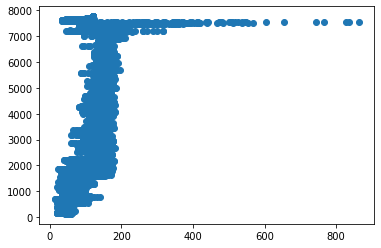

In [ ]:
plt.scatter(df['GR_EDTC'],df['DEPT'])

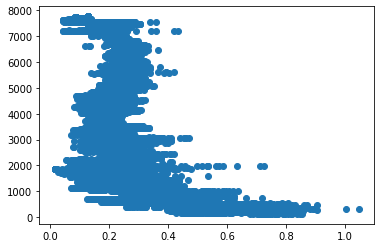

In [ ]:
plt.scatter(df['NPHI'],df['DEPT'])

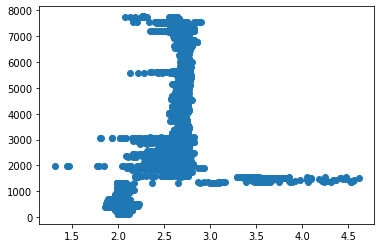

In [ ]:
plt.scatter(df['RHOZ'],df['DEPT'])

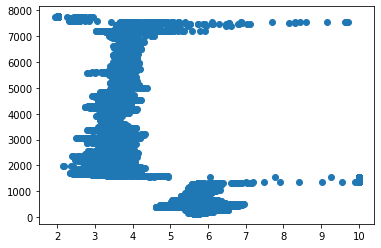

In [ ]:
plt.scatter(df['PEFZ'],df['DEPT'])

(array([3.470e+03, 1.155e+04, 1.650e+02, 5.700e+01, 3.400e+01, 1.200e+01,
        8.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([ 13.2574 ,  98.26745, 183.2775 , 268.28755, 353.2976 , 438.30765,
        523.3177 , 608.32775, 693.3378 , 778.34785, 863.3579 ]),
 <a list of 10 Patch objects>)

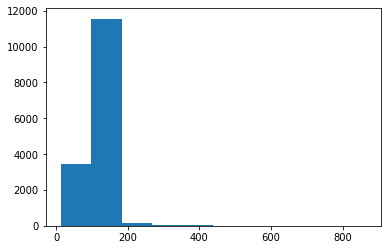

In [ ]:
plt.hist(df['GR_EDTC'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

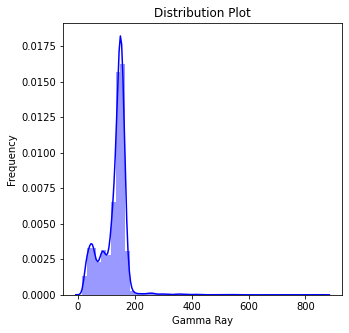

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.distplot(df['GR_EDTC'], color='blue', bins=None)
plt.xlabel('Gamma Ray')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

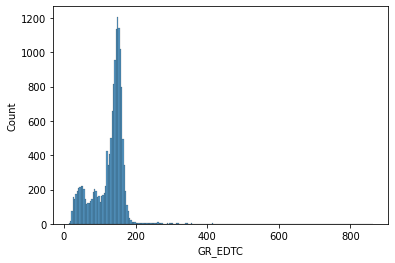

In [ ]:
sns.histplot(df['GR_EDTC'])

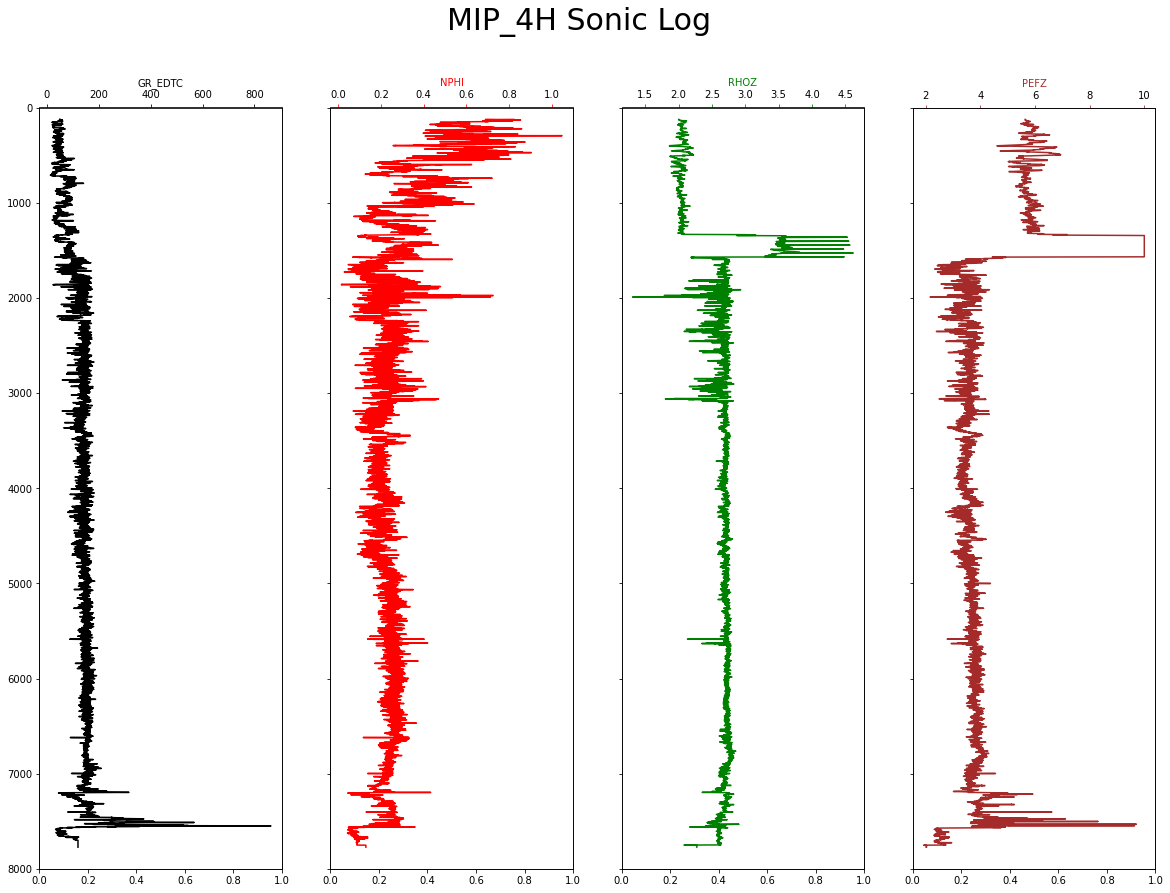

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=4,figsize=(20,14),sharey=True)
fig.suptitle('MIP_4H Sonic Log', fontsize=30)
Name='MIP_4H'
User1 = df[df['Well_Name']==Name]['GR_EDTC']
User2 = df[df['Well_Name']==Name]['DEPT']
ax1=ax[0].twiny()
ax1.invert_yaxis()
ax1.plot(User1,User2, color='black',linestyle='-')
ax1.set_xlabel('GR_EDTC',color='black')
ax1.tick_params(axis='x', color='black')
ax1.set_ylim(bottom=0, top=8000)
ax1.spines['top'].set_position(('outward',1))
User3=df[df['Well_Name']==Name]['NPHI']
User4=df[df['Well_Name']==Name]['DEPT']
ax2=ax[1].twiny() 
ax1.invert_yaxis()
ax2.plot(User3,User4, color='red',linestyle='-')
ax2.set_xlabel('NPHI',color='red')
ax2.tick_params(axis='x', color='red')
ax2.spines['top'].set_position(('outward',1))
User5=df[df['Well_Name']==Name]['RHOZ']
User6=df[df['Well_Name']==Name]['DEPT']
ax3=ax[2].twiny() 
ax1.invert_yaxis()
ax3.plot(User5,User6, color='green',linestyle='-')
ax3.set_xlabel('RHOZ',color='green')
ax3.tick_params(axis='x', color='green')
ax3.spines['top'].set_position(('outward',1))
User7=df[df['Well_Name']==Name]['PEFZ']
User8=df[df['Well_Name']==Name]['DEPT']
ax4=ax[3].twiny()
ax4.invert_yaxis()
ax4.plot(User7,User8, color='brown',linestyle='-')
ax4.set_xlabel('PEFZ',color='brown')
ax4.tick_params(axis='x', color='brown')
ax3.spines['top'].set_position(('outward',1))

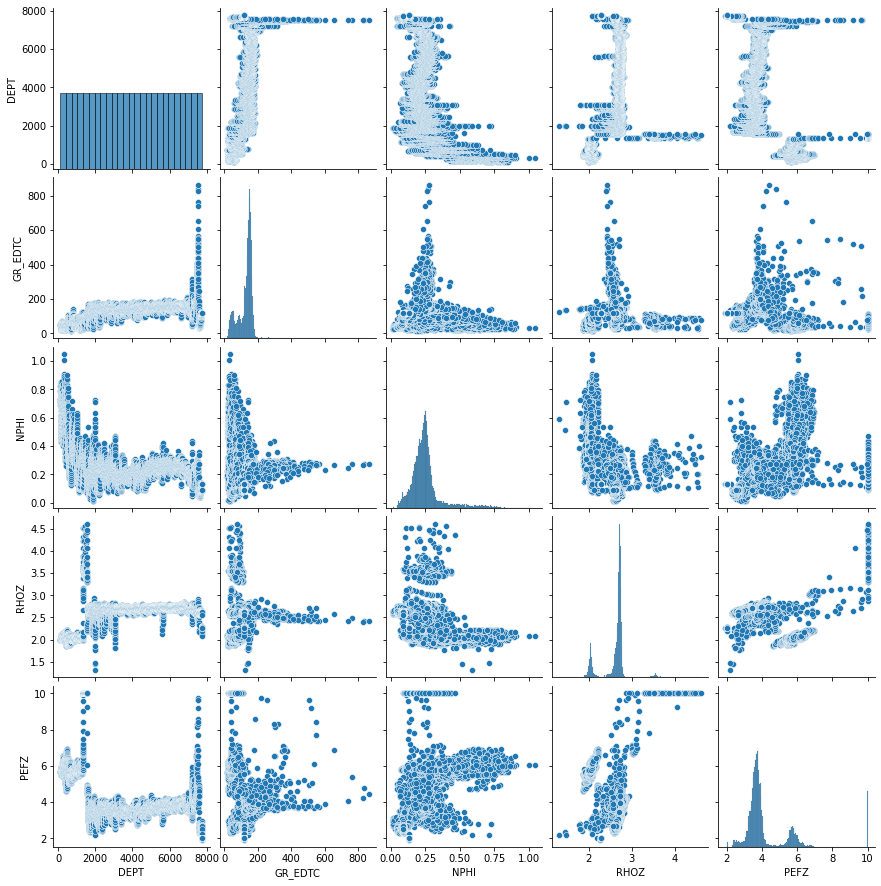

In [ ]:
sns.pairplot(df)

In [ ]:
X=df['DEPT'].values
Y=df['GR_EDTC'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
print(mean_x)
print(mean_y)

3947.75
127.91360173833485


In [ ]:
numer=0
denom=0
for i in range(len(X)):
  numer += (X[i] - mean_x)*(Y[i]-mean_y)
  denom += (X[i] - mean_x)**2
m = numer/denom
c = mean_y - (m*mean_x)

In [ ]:
print(m,c)

0.013116338836189978 76.13357509776586


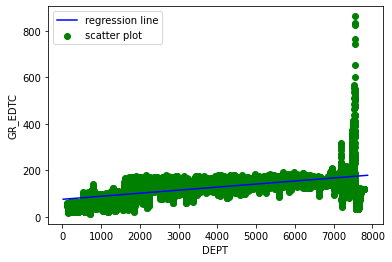

In [ ]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(max_x,min_x,1000)
y = c + m*x
plt.plot(x, y, color = 'blue', label = 'regression line')
plt.scatter(X,Y, color='green', label = 'scatter plot')
plt.xlabel('DEPT')
plt.ylabel('GR_EDTC')
plt.legend()
plt.show()


In [ ]:
ss_t = 0
ss_r = 0
for i in range(len(X)):
  y_pred = c + m*X[i]
  ss_t += ( Y[i] - mean_y)**2
  ss_r += (Y[i] - y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)   

0.3616975475061097


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = X_train.reshape((len(X_train), 1))
X_test = X_test.reshape((len(X_test), 1))
reg = LinearRegression()
reg = reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
test_set_r2= r2_score(Y_test,Y_pred)
print('Testing rˆ2:',round(test_set_r2,2))
Y_pred

Testing rˆ2: 0.37


array([120.15519834, 158.67926218, 177.49833902, ..., 147.97017172,
       150.26311567, 176.79482213])

In [ ]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, Y_pred),5))
print('MSE:', round(metrics.mean_squared_error(Y_test, Y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),5))

MAE: 25.7497
MSE: 1497.32335
RMSE: 38.69526


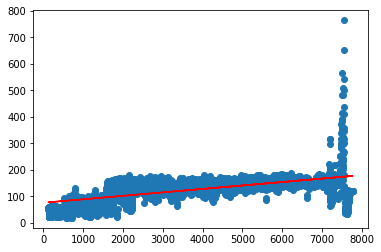

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred, color ='red')


In [ ]:
print(r2)

0.3616975475061097


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
model=RandomForestRegressor()

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
random_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(Y_test,random_pred)
r2

0.9714835055789539

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
randomforest_rmse=mean_squared_error(Y_test,random_pred,squared=False)
randomforest_rmse

8.218553912514027

In [ ]:
model.score(X_train,Y_train)

0.996295621713708

In [ ]:
model.score(X_test,Y_test)

0.9714835055789539

In [ ]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, random_pred),5))
print('MSE:', round(metrics.mean_squared_error(Y_test, random_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, random_pred)),5))

MAE: 5.29499
MSE: 67.54463
RMSE: 8.21855


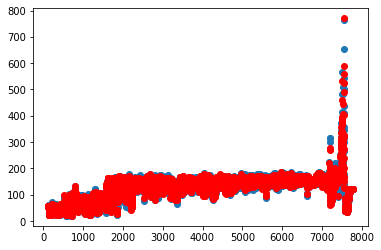

In [ ]:
plt.scatter(X_test,Y_test)
plt.scatter(X_test,random_pred, color ='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

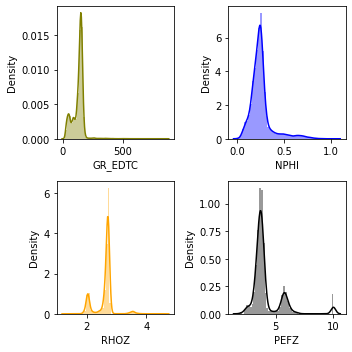

In [ ]:
f, axes=plt.subplots(2,2, figsize=(5, 5))
#sns.distplot(df['DEPT'], color="red", ax=axes[0, 0])
sns.distplot(df['GR_EDTC'], color="olive", ax=axes[0, 0])
sns.distplot(df['NPHI'], color="blue", ax=axes[0, 1])
sns.distplot(df['RHOZ'], color="orange",ax=axes[1, 0])
sns.distplot(df['PEFZ'], color="black", ax=axes[1, 1])
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

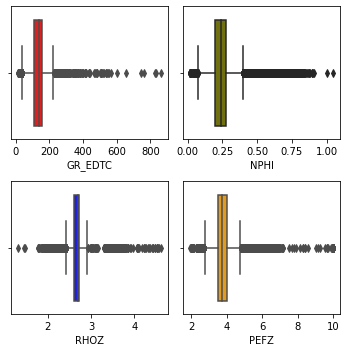

In [ ]:
f, axes=plt.subplots(2, 2, figsize=(5, 5))
sns.boxplot(df['GR_EDTC'], color="red", ax=axes[0, 0])
sns.boxplot(df['NPHI'], color="olive", ax=axes[0, 1])
sns.boxplot(df['RHOZ'], color="blue", ax=axes[1, 0])
sns.boxplot(df['PEFZ'], color="orange", ax=axes[1, 1])
plt.tight_layout()

In [ ]:
df.describe()

,DEPT,GR_EDTC,NPHI,RHOZ,PEFZ
count,15302.000000,15302.000000,15302.000000,15302.000000,15302.000000
mean,3947.750000,127.913602,0.253623,2.608529,4.156209
std,2208.725622,48.170551,0.116781,0.304528,1.361382
min,122.500000,13.257400,0.016200,1.309600,1.932800
25%,2035.125000,107.349725,0.193000,2.607200,3.510000
50%,3947.750000,141.253500,0.238800,2.696450,3.735450
75%,5860.375000,153.949925,0.274500,2.729300,4.017775
max,7773.000000,863.357900,1.046800,4.618500,10.000000


In [ ]:
df['Vsh'] = (df.GR_EDTC - df.GR_EDTC.min()) / (df.GR_EDTC.max() - df.GR_EDTC.min())

In [ ]:
df['Vsh']

0        0.043267
1        0.045347
2        0.043629
3        0.041324
4        0.041649
           ...   
15297    0.125288
15298    0.125288
15299    0.125288
15300    0.125288
15301    0.125288
Name: Vsh, Length: 15302, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


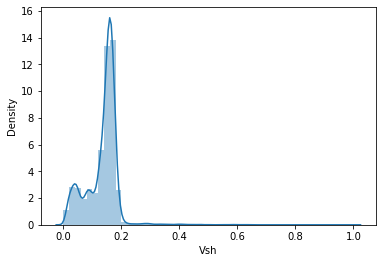

In [ ]:
sns.distplot(df['Vsh'])

Text(0, 0.5, 'DEPTH')

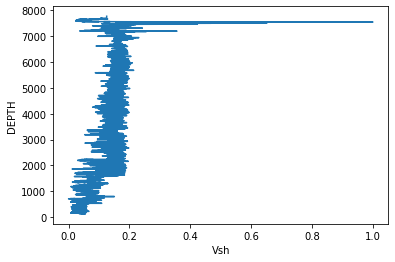

In [ ]:
plt.plot(df['Vsh'],df['DEPT'])
plt.xlabel('Vsh')
plt.ylabel('DEPTH')

In [ ]:
df.head(2)

,Well_Name,DEPT,GR_EDTC,NPHI,RHOZ,PEFZ,Vsh
0,MIP_4H,122.5,50.0387,0.8214,2.0006,5.6412,0.043267
1,MIP_4H,123.0,51.8071,0.7914,2.0006,5.6412,0.045347


In [ ]:
from sklearn import svm

In [ ]:
model2=svm.SVR()
model2.fit(X_train,Y_train)

SVR()

In [ ]:
svm_pred= model2.predict(X_test)
svm_r2= r2_score(Y_test,svm_pred)
svm_r2

0.5033092234349181

In [ ]:
svm_rmse=mean_squared_error(Y_test,svm_pred,squared=False)
svm_rmse

34.2997052574372

ValueError: ignored

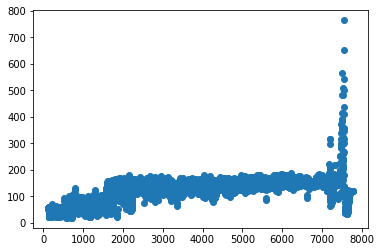

In [ ]:
plt.scatter(X_test,Y_test)
plt.scatter(X_test,model2, color ='red')